<a href="https://colab.research.google.com/github/RehanShabbir16/Modern_computer_vision_with_pytorch/blob/main/Chap_4_Intro_to_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import datasets
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
fmnist=datasets.FashionMNIST(root="data",download=True, train=False)


100%|██████████| 26421880/26421880 [00:02<00:00, 10437200.06it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 166773.16it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1552332.66it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5359214.94it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:

tr_images = fmnist.data
tr_targets = fmnist.targets

In [21]:
class FMNISTDataset(Dataset):
  def __init__(self,x,y):
    x=x/255.0
    x=x.view(-1,1,28,28)
    self.x, self.y=x,y
  def __len__(self):
    return len(self.x)
  def __getitem__(self,idx):
    x,y= self.x[idx], self.y[idx]
    return x.to(device), y.to(device)

In [22]:
def Model1():
  model = nn.Sequential(
        nn.Conv2d(1, 64, kernel_size=3),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Conv2d(64, 128, kernel_size=3),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(3200, 256),
        nn.ReLU(),
        nn.Linear(256, 10)
    ).to(device)

  loss_fn = nn.CrossEntropyLoss()
  optimizer = Adam(model.parameters(), lr=1e-3)
  return model, loss_fn, optimizer

In [23]:
def train_batch(model, loss_fn, optimizer, x,y):
  model.train()
  pred=model(x)
  loss=loss_fn(pred,y)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  return loss.item()


In [24]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [25]:
def get_data():
  data=FMNISTDataset(tr_images, tr_targets)
  data_loader=DataLoader(data, batch_size=32, shuffle=True)
  return data_loader

In [26]:
@torch.no_grad()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

In [27]:
trn_dl=get_data()
model, loss_fn, optimizer=Model1()

In [28]:
train_losses, train_aacuracies=[],[]
for epoch in range(10):
  batch_losses, batch_accuracies=[],[]
  for ix,batch in enumerate(iter(trn_dl)):
    x,y=batch
    loss=train_batch(model, loss_fn, optimizer, x,y)
    batch_losses.append(loss)
  train_l=np.array(batch_losses).mean()
  for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        batch_accuracies.extend(is_correct)
  train_acc = np.mean(batch_accuracies)

  train_losses.append(train_l)
  train_aacuracies.append(train_acc)

In [36]:
train_losses

[0.7473954575511214,
 0.46999547632928856,
 0.4041266361840617,
 0.3537919981696735,
 0.3204333632946395,
 0.2773849817391592,
 0.2491878972123987,
 0.21659716002690715,
 0.19147226264396797,
 0.1629009547438056]

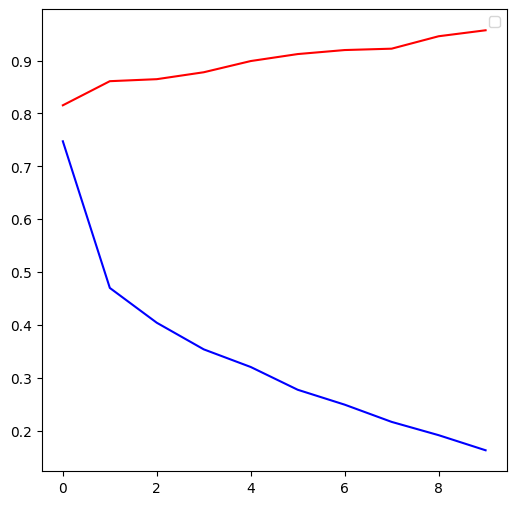

In [39]:
plt.figure(figsize=(6,6))
plt.plot(train_losses, color="blue")
plt.plot(train_aacuracies, color="red")
plt.legend()